# Stock Prices Prediction and Forecasting using Keras LSTM

# Data Preprocessing

Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Training Dataset

In [ ]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [ ]:
y_train

array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

### Reshaping Dataset

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

# Importing Keras Libraries and Packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Model Building

Initialising the Recurrent Neural Network (RNN)

In [ ]:
regressor = Sequential()

Adding first LSTM layer and some dropouts

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding second LSTM layer and some dropouts

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding third LSTM layer and some dropouts

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding fourth LSTM layer and some dropouts

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

# Model Compiling and Fitting

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to Training Data Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 16s 111ms/step - loss: 0.0107
Epoch 2/100
62/62 [==============================] - 8s 135ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0025
Epoch 4/100
62/62 [==============================] - 8s 134ms/step - loss: 0.0023
Epoch 5/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 8s 134ms/step - loss: 0.0024
Epoch 10/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 8s 132ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0017
Epoch 13/100

KeyboardInterrupt: 

# Model Prediction

Getting the real stock price of TATAGLOBAL in 2017

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,12/29/2017,308.05,318.00,306.35,316.05,316.40,6874520,21586.26
1,12/28/2017,306.50,309.30,303.55,306.80,306.60,4620000,14164.22
2,12/27/2017,305.50,308.80,302.50,305.65,305.55,3315278,10164.51
3,12/26/2017,303.70,307.70,300.55,305.50,305.95,3956481,12073.55
4,12/22/2017,301.00,306.35,299.70,302.80,302.75,4703911,14271.47
...,...,...,...,...,...,...,...,...
243,1/6/2017,125.40,126.95,124.05,124.50,124.65,1255021,1573.67
244,1/5/2017,124.75,125.65,124.55,125.30,125.20,503565,630.23
245,1/4/2017,125.00,126.05,123.80,124.10,124.45,656213,818.98
246,1/3/2017,122.80,125.40,122.80,124.75,124.45,580430,721.93


In [ ]:
real_stock_price

array([[308.05],
       [306.5 ],
       [305.5 ],
       [303.7 ],
       [301.  ],
       [302.25],
       [301.  ],
       [292.  ],
       [280.  ],
       [289.  ],
       [288.  ],
       [290.  ],
       [298.6 ],
       [290.  ],
       [287.55],
       [276.  ],
       [278.9 ],
       [279.4 ],
       [285.  ],
       [288.45],
       [278.9 ],
       [287.3 ],
       [277.  ],
       [277.5 ],
       [275.05],
       [273.15],
       [273.5 ],
       [275.9 ],
       [261.15],
       [252.25],
       [254.  ],
       [237.9 ],
       [234.7 ],
       [236.3 ],
       [240.7 ],
       [225.8 ],
       [226.  ],
       [235.  ],
       [224.9 ],
       [227.  ],
       [227.9 ],
       [226.95],
       [226.95],
       [225.  ],
       [211.3 ],
       [204.95],
       [211.  ],
       [204.  ],
       [205.5 ],
       [207.9 ],
       [211.45],
       [210.4 ],
       [210.3 ],
       [211.  ],
       [211.  ],
       [209.45],
       [209.5 ],
       [209.65],
       [210.  

Getting predicted stock price of 2017 TATAGLOBAL

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 309):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 34ms/step


# Visualizing the Predicted and Real results

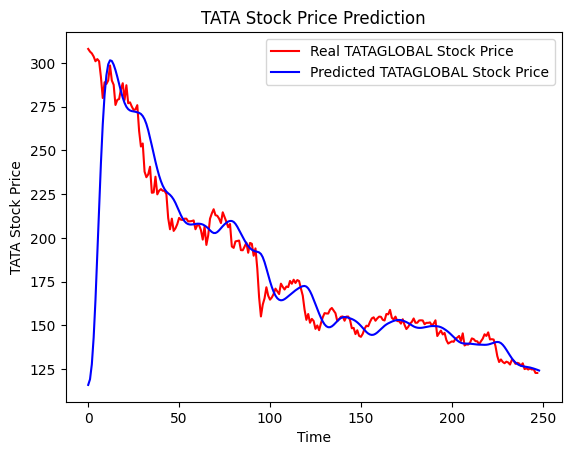

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATAGLOBAL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATAGLOBAL Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()